# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [257]:
import numpy as np

### Simulation du lancé de dé

In [261]:
def Roll():
    return int(np.random.choice(range(1,20),1))

In [262]:
Roll()


15

### Compléter le code et commenter

In [263]:
A=0
NA=0
S=10
temp = Roll()
#NA=1
#np.random.seed(10)
while temp != 6:
    NA=NA+1
    temp = Roll()
    print("temp =>",temp," NA =>",NA)
   
A = 1
print(NA)
while temp != S:
    NA=NA+1
    temp = Roll()
    if A+temp < S:
        A+=temp
        print("temp =>",temp," NA =>",NA," A =>",A)
    elif A+temp == S:
        A=s
        print("temp =>",temp," NA =>",NA," A =>",A)



temp => 9  NA => 1
temp => 17  NA => 2
temp => 16  NA => 3
temp => 10  NA => 4
temp => 7  NA => 5
temp => 6  NA => 6
6
temp => 4  NA => 7  A => 5
temp => 4  NA => 9  A => 9


In [225]:
#A=0
#NA=0
#S=10
#c=0
#while (A<S) :
#    pass

### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [264]:
def sim(s):
    A=0
    NA=0
    c=0
    temp = Roll()
    #NA=1
    #np.random.seed(10)
    while temp != 6:
        temp = Roll()
        NA+=1
        #print("temp =>",temp," NA =>",NA)

    A = 1
    #print(NA)
    while A != S:
        NA=NA+1
        temp = Roll()
        if A+temp < S:
            #NA=NA+1
            A+=temp
            #print("temp =>",temp," NA =>",NA," A =>",A)
        elif A+temp == S:
            A=s
            #NA=NA+1
            #print("temp =>",temp," NA =>",NA," A =>",A)
       
    return NA
    

In [265]:
sim(10)

24

# Simulation de $10^5$  scénario 

In [285]:
Freq=np.fromiter((sim(10) for i in range(10**2)),dtype=int)

In [286]:
ESP=Freq.sum()/10**2
ESP

37.66

In [287]:
x=list(range(10,20))

In [ ]:
y=[np.fromiter((sim(u) for i in range(10)),dtype=int).sum()/10 for u in x]

In [241]:
import matplotlib.pyplot as plt

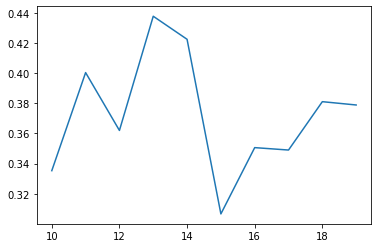

In [245]:
plt.plot(x,y)


In [188]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [189]:
slope

-0.179624242424243

In [190]:
intercept


40.56475151515152

E(X)= slope * n + intercept

In [246]:
yy = [(slope* u) + intercept for u in x ]

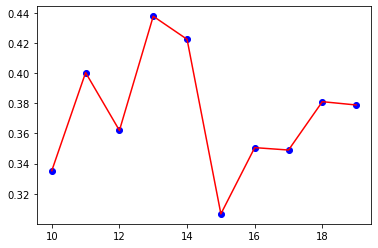

In [252]:
plt.plot(x,y,'ob',x,y,'r')